In [3]:
import pandas as pd

df = pd.read_pickle("all_size_withyes.pkl")
df[:10]
df.shape

(92471, 12502)

In [4]:
df.sort_values("vmlinux")

,X86_LOCAL_APIC,OPENVSWITCH,TEXTSEARCH_FSM,LOCKDEP_SUPPORT,GENERIC_CLOCKEVENTS_MIN_ADJUST,NETFILTER_XT_MATCH_TCPMSS,MPLS,NFC_HCI,STACKTRACE_SUPPORT,GENERIC_CMOS_UPDATE,...,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4,cid,nbyes,nbno,nbmodule,nbyesmodule
109097,1,0,0,1,1,0,0,0,1,1,...,2863640,644621,814544.0,2900824,669288,124978,241,12237,0,241
58621,1,0,0,1,1,0,0,0,1,1,...,2777624,558712,724432.0,2810712,578375,74458,240,12238,0,240
107213,1,0,0,1,1,0,0,0,1,1,...,3953176,1734208,1986512.0,4072280,1841339,123091,741,11068,669,1410
99232,1,0,0,1,1,0,0,0,1,1,...,4248440,2027905,2290640.0,4375728,2144007,115110,636,11131,711,1347
99777,1,0,0,1,1,0,0,0,1,1,...,4096536,1877790,2139088.0,4223832,1994471,115655,721,11351,406,1127
91160,1,0,0,1,1,0,0,0,1,1,...,4297240,2077003,2347472.0,4432728,2203924,107038,847,10831,800,1647
109537,1,0,0,1,1,0,0,0,1,1,...,4232056,2011955,2282448.0,4367536,2133755,125418,724,11226,528,1252
80771,1,0,0,1,1,0,0,0,1,1,...,4338200,2120182,2397136.0,4481880,2251054,96648,857,11163,458,1315
66399,1,0,0,1,1,0,0,0,1,1,...,4621176,2401304,2691024.0,4777136,2542313,82269,816,10731,931,1747
96643,1,0,0,1,1,0,0,0,1,1,...,4928376,2707431,3019728.0,5104816,2870154,112521,835,10926,717,1552


In [5]:
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

<Figure size 432x288 with 0 Axes>

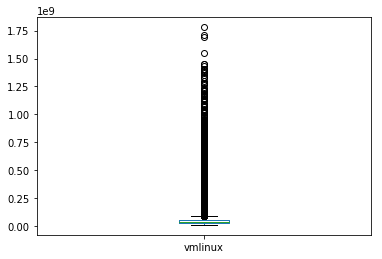

<Figure size 432x288 with 0 Axes>

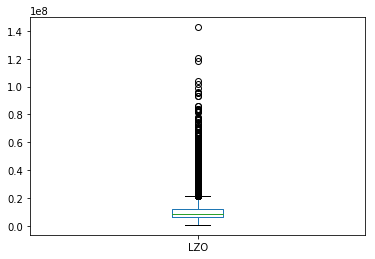

<Figure size 432x288 with 0 Axes>

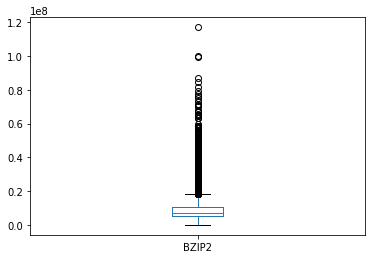

count    9.247100e+04
mean     4.965147e+07
std      7.076389e+07
min      7.304656e+06
25%      2.262344e+07
50%      3.145285e+07
75%      4.777581e+07
max      1.780630e+09
Name: vmlinux, dtype: float64

In [7]:
import matplotlib.pyplot as plt
plt.figure()
pd.DataFrame(df['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(df['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(df['BZIP2']).plot.box()
plt.show(block=False)


df['vmlinux'].describe()

In [9]:
import scipy.stats
import seaborn as sns
import numpy as np



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(df[compress_method + size_measure_of_interest] / df[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,3.00927,23.8295,35.775,-9.70977,-11896.2
BZIP2o,-2.87205,0,20.276,31.8624,-12.3289,-11441.1
LZMAo,-19.1917,-16.7598,0,9.63275,-27.0131,-9365.11
XZo,-9079.37,-9077.15,-9061.82,0,-33.2221,-8685.34
LZOo,-17283,-17279.7,-17256.6,50.5076,0,-13211.9
LZ4o,-18866,-18862.5,-18837.6,61.0352,6.93776,0


In [10]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-28.1465,17.6087,25.5951,-7.48979,-12.3437
BZIP2o,41.0556,0,65.3317,76.2405,30.6506,23.8874
LZMAo,-14.8725,-39.0396,0,6.74528,-21.2054,-25.3171
XZo,-20.0819,-42.8681,-6.15874,0,-26.0152,-29.8666
LZOo,8.14584,-22.1959,27.2664,35.9318,0,-5.26847
LZ4o,14.2047,-17.7728,34.4445,43.6185,5.57607,0


In [11]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(df[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)

,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.516397,0.516424,0.515071,0.529437,0.529293,0.528244,0.500999,0.501036,0.499203,0.500264,0.500304,0.498854,0.533398,0.533565,0.532801,0.540692,0.540869,0.540197
GZIP-bzImage,0.516397,1,1,0.999932,0.997733,0.997131,0.997819,0.997759,0.99776,0.997626,0.99354,0.993543,0.993413,0.997473,0.997486,0.9976,0.994642,0.994656,0.994786
GZIP-vmlinux,0.516424,1,1,0.999931,0.997737,0.997135,0.997823,0.997757,0.997759,0.997624,0.993538,0.993541,0.993411,0.997477,0.997491,0.997603,0.994648,0.994662,0.994792
GZIP,0.515071,0.999932,0.999931,1,0.99754,0.996936,0.997737,0.997697,0.997698,0.997745,0.993578,0.993579,0.993478,0.997334,0.997302,0.997432,0.994445,0.99441,0.994555
BZIP2-bzImage,0.529437,0.997733,0.997737,0.99754,1,0.999404,0.999953,0.994638,0.994645,0.994338,0.991162,0.991171,0.99082,0.998566,0.998574,0.998554,0.997401,0.997408,0.997418
BZIP2-vmlinux,0.529293,0.997131,0.997135,0.996936,0.999404,1,0.999356,0.99403,0.994038,0.993728,0.990537,0.990546,0.990193,0.997976,0.997984,0.997964,0.996818,0.996825,0.996834
BZIP2,0.528244,0.997819,0.997823,0.997737,0.999953,0.999356,1,0.994737,0.994744,0.994586,0.991346,0.991354,0.991032,0.998564,0.998536,0.998534,0.997339,0.997307,0.997333
LZMA-bzImage,0.500999,0.997759,0.997757,0.997697,0.994638,0.99403,0.994737,1,1,0.99988,0.994359,0.99436,0.994294,0.991706,0.991731,0.991878,0.987196,0.987223,0.987383
LZMA-vmlinux,0.501036,0.99776,0.997759,0.997698,0.994645,0.994038,0.994744,1,1,0.999879,0.994359,0.994359,0.994292,0.991713,0.991738,0.991885,0.987205,0.987233,0.987392
LZMA,0.499203,0.997626,0.997624,0.997745,0.994338,0.993728,0.994586,0.99988,0.999879,1,0.99437,0.99437,0.994341,0.991475,0.99144,0.99161,0.986886,0.986848,0.987028
